### Problem Statement 
* This project understand how the student performance(test score) affected by other variable such as a Gender,Ethnicity, Parental level of education, test preparation course

In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df=pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [35]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [26]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
df.duplicated().sum( )

np.int64(0)

In [28]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [37]:
## Value Count of each category 

In [29]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [30]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [32]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [33]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [36]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [42]:
numerical_features=[i for i in df.columns if df[i].dtype!='O']
categorical_features=[j for j in df.columns if df[j].dtype=='O']

print('we have {} numerical features : {}'.format(len(numerical_features),numerical_features))
print('\nwe have {} categorical features: {}'.format(len(categorical_features),categorical_features))

we have 3 numerical features : ['math score', 'reading score', 'writing score']

we have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [43]:
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['average_score']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [48]:
maths_full=df[df['math score']==100]['average_score'].count()
reading_full=df[df['reading score']==100]['average_score'].count()
writing_full=df[df['writing score']==100]['average_score'].count()

print(f'No. of student that got full marks in Maths:{maths_full}')
print(f'No. of student that got full marks in Reading:{reading_full}')
print(f'No. of student that got full marks in Writing:{writing_full}')

No. of student that got full marks in Maths:7
No. of student that got full marks in Reading:17
No. of student that got full marks in Writing:14


In [49]:
maths_less_20=df[df['math score']<=20]['average_score'].count()
reading_less_20=df[df['reading score']<=20]['average_score'].count()
writing_less_20=df[df['writing score']<=20]['average_score'].count()

print(f'No. of student that got less then 20 marks in Maths:{maths_less_20}')
print(f'No. of student that got less then 20 marks in Reading:{reading_less_20}')
print(f'No. of student that got less then 20 marks in Writing:{writing_less_20}')

No. of student that got less then 20 marks in Maths:4
No. of student that got less then 20 marks in Reading:1
No. of student that got less then 20 marks in Writing:3


<Axes: xlabel='average_score', ylabel='Count'>

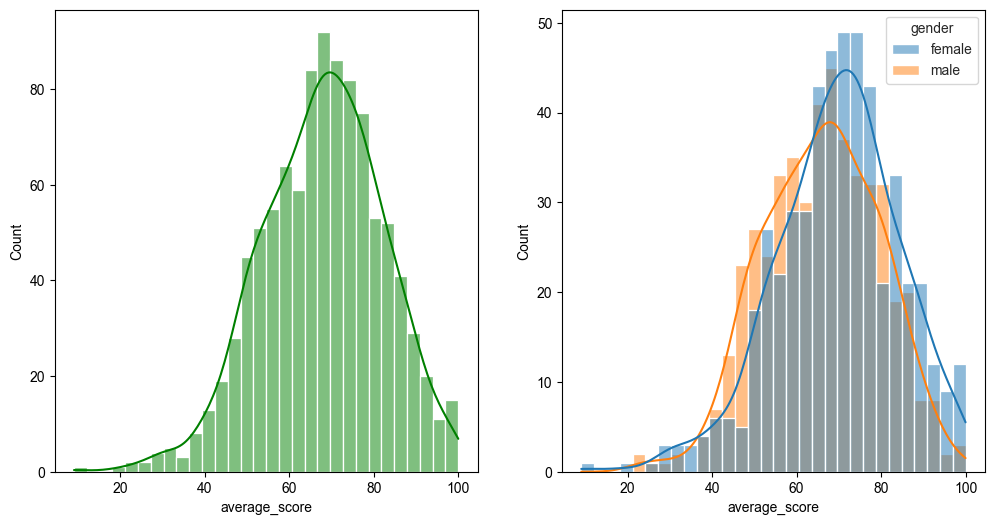

In [52]:
fig,axs=plt.subplots(1,2,figsize=(12,6))
sns.set_style('whitegrid')
plt.subplot(121)
sns.histplot(data=df,x='average_score',kde=True,bins=30,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,bins=30,color='g',hue='gender')


In [53]:
# Female student tends to perform well then male student